In [11]:
#!pip install scipy
#!pip install numpy
#!pip install matplotlib

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

%matplotlib inline

In [13]:
"Parameters"

t0 = 0
t1 = 400
z = 0.1
ti = np.arange(t0, t1 + z, z, dtype = np.double)
t = [0]
h = [z]
x = [0.005]
tolerance = 10**(-6)
print(x[0])
print(ti)

0.005
[0.000e+00 1.000e-01 2.000e-01 ... 3.998e+02 3.999e+02 4.000e+02]


In [14]:
"IVP0"
ivp3 = lambda t, x: x**2 - x**3

"Exact Solution"
ex_sol = solve_ivp(ivp3, [t0, t1], x)

print(x)

[0.005]


In [15]:
"Runge Kutta 4 Method"
def RK4(f):
    "Save variable"
    rk4_x = []
    for i in range(0, len(ti)):
        rk4_x.append(x[i])
        k1 = h[0] * f(ti[i],x[i])
        k2 = h[0] * f(ti[i]+h[0]/2, x[i]+k1/2)
        k3 = h[0] * f(ti[i]+h[0]/2, x[i]+k2/2)
        k4 = h[0] * f(ti[i]+h[0], x[i]+k3)
        x.append(x[i] + (k1 + 2*(k2+k3) + k4)/6)
    "Return the initial t and h as they are constant"
    return ti, h[0], rk4_x

In [16]:
"Fourth order Adaptive Runge-Kutta-Fehlberg Method"
def RKF45(f):
    "Reset"
    t = [0]
    h = [z]
    x = [0.005]
    "Iterator"
    i = 0
    "Save variables"
    rkf45_x = []
    rkf45_t = []
    rkf45_h = []
    while True:
        "Condition to break: Time exceeds the given interval"
        if t[i] > t1:
            break
        "Append the computed values to the save variables"
        rkf45_x.append(x[i])
        rkf45_h.append(h[i])
        rkf45_t.append(t[i])
        "The Formulas"
        k1 = h[i] * f(t[i],x[i])
        k2 = h[i] * f(t[i]+h[i]/4, x[i]+k1/4)
        k3 = h[i] * f(t[i]+3*h[i]/8, x[i] + 3*k1/32 + 9*k2/32)
        k4 = h[i] * f(t[i]+12*h[i]/13, x[i] + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h[i] * f(t[i]+h[i], x[i] + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h[i] * f(t[i]+h[i]/2, x[i] - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
        x.append(x[i] + 16*k1/135 + 6656*k3/12825 + 28561*k4/56430 - 9*k5/50 + 2*k6/55)
        TruncationError = np.abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50 + 2*k6/55)
        h.append(0.9*h[i]*((tolerance/TruncationError)**(1/5)))
        t.append(t[i] + h[i])
        i += 1
    return rkf45_t, rkf45_h, rkf45_x

In [17]:
"Fourth order Adams-Bashforth scheme"
def AB4(f):
    x = RK4(f)[2]
    i = 3
    while i < len(ti)-1:
        x[i+1] = x[i] + h[0]*(55*f(ti[i], x[i])/24 - 59*f(ti[i-1], x[i-1])/24 + 37*f(ti[i-2], x[i-2])/24 - 9*f(ti[i-3], x[i-3])/24)
        i += 1
    return ti, h[0], x

In [18]:
"The Predictor-Corrector model: fourth order Adam-Bashforth and fourth order Adam- Moulton"
def AB4_AM4(f):
    x = RK4(f)[2]
    i = 3
    while i < len(ti)-1:
        x[i+1] = x[i] + h[0]*(55*f(ti[i], x[i])/24 - 59*f(ti[i-1], x[i-1])/24 + 37*f(ti[i-2], x[i-2])/24 - 9*f(ti[i-3], x[i-3])/24)
        x[i+1] = x[i] + h[0]*(9*f(ti[i+1], x[i+1])/24 + 19*f(ti[i], x[i])/24 - 5*f(ti[i-1], x[i-1])/24 + f(ti[i-2], x[i-2])/24)
        i += 1
    return ti, h[0], x

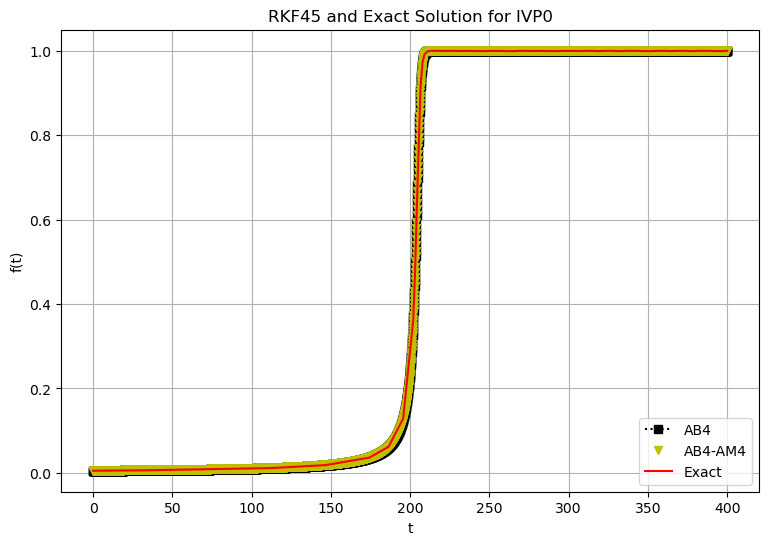

In [19]:
#Compare desired scheme with the exact solution by commenting the others
plt.figure(figsize = (9, 6))
plt.title('RKF45 and Exact Solution for IVP0')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.plot(AB4(ivp3)[0], AB4(ivp3)[2],'ks:', label='AB4')
plt.plot(AB4_AM4(ivp3)[0], AB4_AM4(ivp3)[2],'yv', label='AB4-AM4')
plt.plot(ex_sol.t, ex_sol.y[0],'r', label='Exact')
plt.legend(loc='lower right')
plt.show()

Remark: Nothing special happens, it just solves the IVP